<a href="https://colab.research.google.com/github/OlgaShevel/Others/blob/main/!youtube_s%D1%81rapper_frame_by_frame_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.1 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
from moviepy.editor import VideoFileClip
from PIL import Image
from pytube import YouTube
from IPython.display import display

Размер видео: 640x360
Количество кадров: 6612


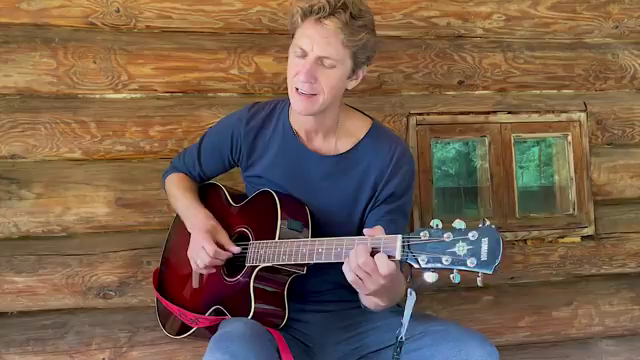

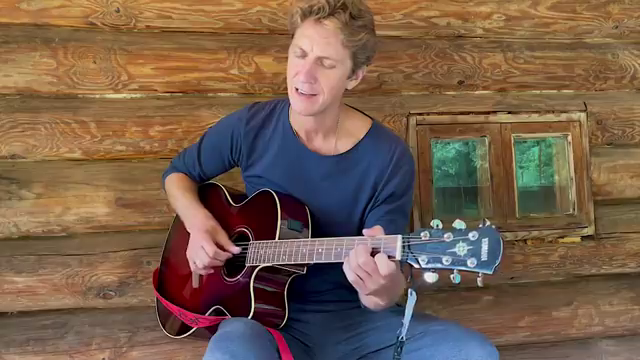

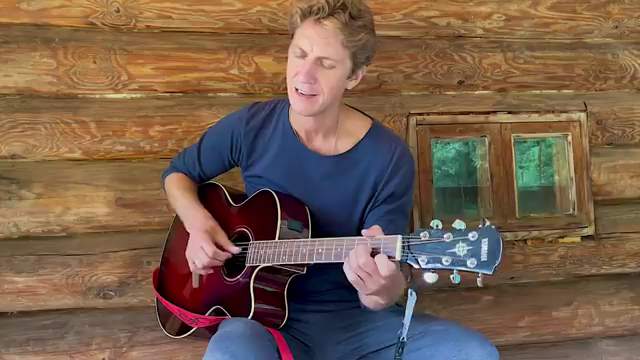

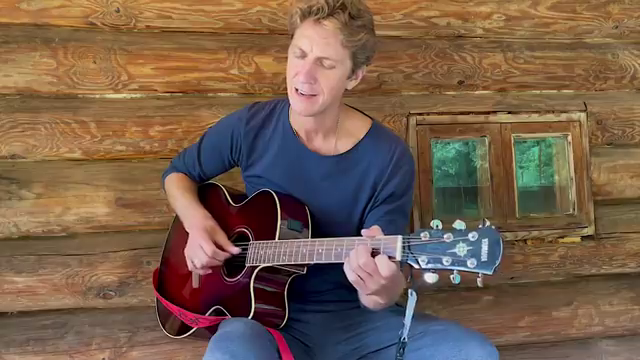

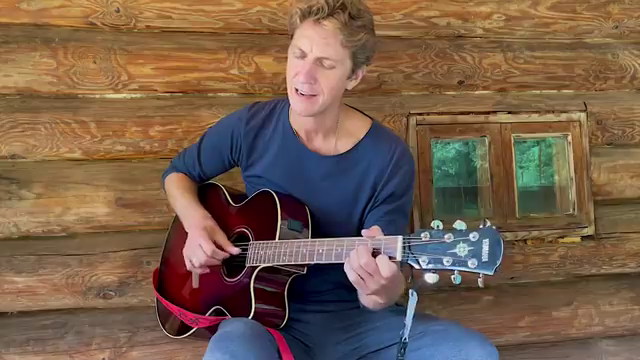

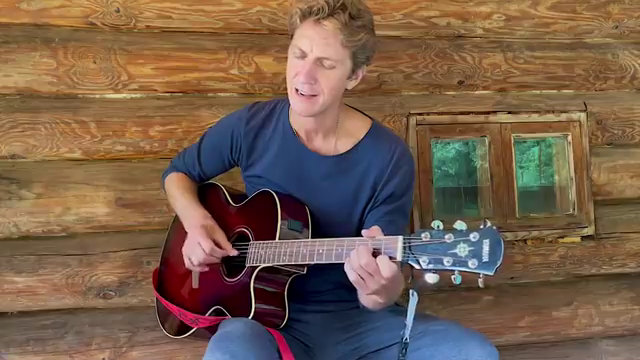

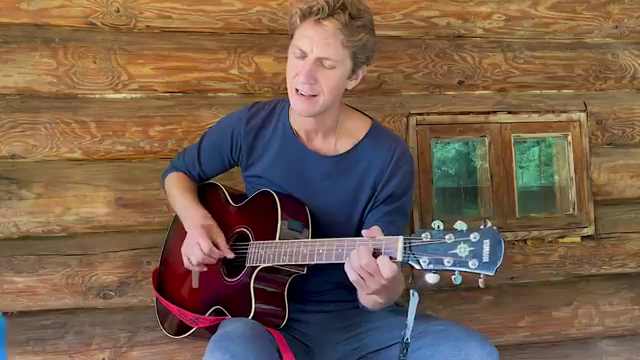

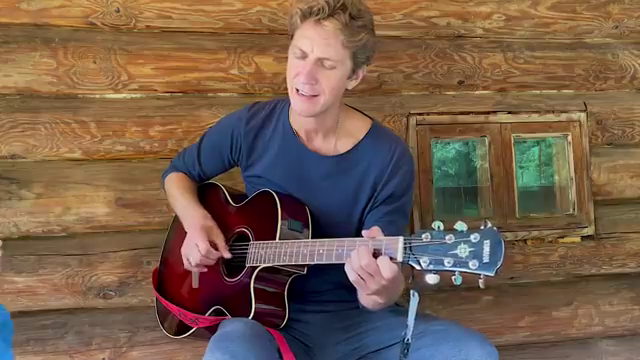

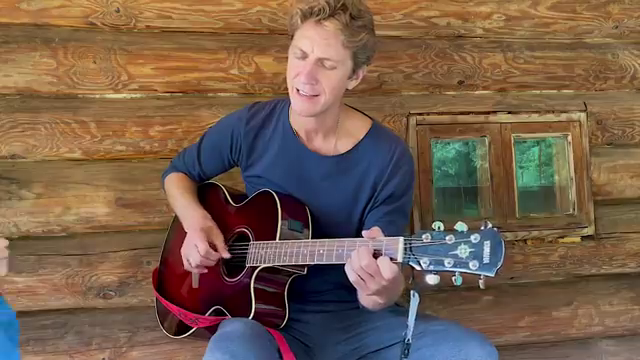

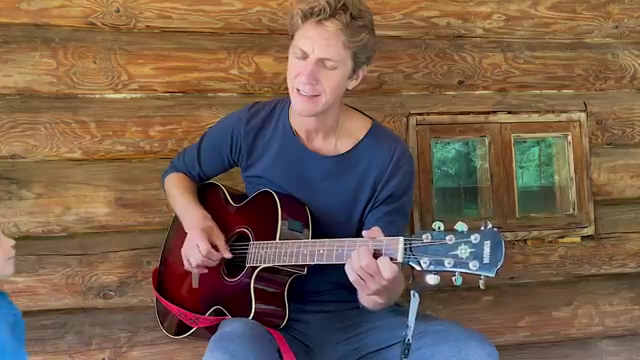

In [ ]:
def yout(video):
    frames_folder = "/content/kadr_video"
    os.makedirs(frames_folder, exist_ok=True)

    yt = YouTube(video)
    video_stream = yt.streams.first()
    video_filename = "video.mp4"
    video_stream.download(output_path="/content", filename=video_filename)

    cap = cv2.VideoCapture(video_filename)

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    print(f"Размер видео: {width}x{height}")

    clip = VideoFileClip(f"/content/{video_filename}")
    for i, frame in enumerate(clip.iter_frames()):
        frame_filename = f"frame_{i}.jpg"
        frame_path = os.path.join(frames_folder, frame_filename)
        frame_array = np.array(frame)
        frame_rgb = cv2.cvtColor(frame_array, cv2.COLOR_BGR2RGB)
        frame_image = Image.fromarray(frame_rgb)
        frame_image.save(frame_path)

    frame_files = os.listdir(frames_folder)
    frame_count = len(frame_files)
    print(f"Количество кадров: {frame_count}")

    cap = cv2.VideoCapture(video_filename)

    frame_count = 0
    #frame_rate = 30  # 1 кадр/cек
    while cap.isOpened() and frame_count < 10:
        ret, frame = cap.read()
        if not ret:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        resized_frame = cv2.resize(frame, (320, 180))
        display(Image.fromarray(frame_rgb))

        frame_count += 1
    cap.release()

youtube_video_url = "https://youtu.be/K3zZn_0pl9M"
yout(youtube_video_url)